In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
from scipy.integrate import solve_ivp

In [21]:
# Number of agents
n= 5

# Sensing graph input
L = np.zeros((n,n),dtype= complex)

Llf = np.array([[-1,0],[-1j,0],[0,-2j]],dtype = complex)
Lff = np.array([[1+1j,0,-1j],[0,1+1j,-1],[-2*(1-1j),-1*(1+1j),3+1j]],dtype=complex)

L[2:n,0:2] = Llf
L[2:n,2:n] = Lff

# Communication graph input
H = np.zeros((n,n))

Hlf = np.array([[-1/2,0],[-1/2,0],[0,-1/3]])
Hff = np.array([[1,0,-1/2],[0,1,-1/2],[-1/3,-1/3,1]])

H[2:n,0:2] = Hlf
H[2:n,2:n] = Hff

Hcomp = np.zeros((n,n))
Hcomp[0:2,0:2]= np.identity(2)

Hbar = Hcomp + H

# For formation control law
eta = np.zeros((np.shape(L)[0]))
for i in range(0,np.shape(L)[0]):
    if i>=2:
        eta[i] = 0
    elif i<2:
        eta[i] = 1

# Input velocity of co-leaders
def Leader_v0(t):
    v0_real = 2*t*np.cos([0.1*t])
    v0_imag = 0.5*t*np.sin([0.1*t])
    v0 = 0.2*complex(v0_real,v0_imag)
    return v0

# Stabilization matrix (Important)
D =np.diag([1,1,5,5*np.exp(complex(0,np.pi/10)),np.exp(complex(0,-3*np.pi/4))]) 

In [22]:
#Single integrator kinematics fomration control
def single_kinematics(tsim,z_init):
    
    def formation_SIK(t,z):      
        dzdt = np.matmul(np.linalg.inv(Hbar),(-np.matmul(np.matmul(D,L),z)+np.multiply(eta,Leader_v0(t))))       
        return dzdt
    
    sol = solve_ivp(formation_SIK,[tsim[0], tsim[-1]],z_init,t_eval=tsim)

    return sol

In [27]:
#Simulation parameters
z_init = [0+1j,0+2.3j,-2.1-2.1j,-2.2+1.9j,+3-1.2j] 
tsim = np.arange(0,20,.001)

sol =single_kinematics(tsim,z_init)

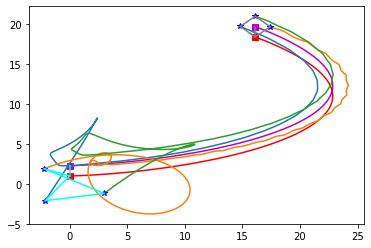

In [28]:
#Simulation Results
plt.figure(1)
for i in range(0,n):
    if i == 0 :
        plt.plot(sol.y[i].real,sol.y[i].imag,'r-')
        plt.plot(sol.y[i][-1].real,sol.y[i][-1].imag,'rs')
        plt.plot(sol.y[i][0].real,sol.y[i][0].imag,'rs')
    elif i == 1:
        plt.plot(sol.y[i].real,sol.y[i].imag,'m-')
        plt.plot(sol.y[i][-1].real,sol.y[i][-1].imag,'ms')
        plt.plot(sol.y[i][0].real,sol.y[i][0].imag,'ms')
    else:
        plt.plot(sol.y[i].real,sol.y[i].imag)
        plt.plot(sol.y[i][-1].real,sol.y[i][-1].imag,'b*')
        plt.plot(sol.y[i][0].real,sol.y[i][0].imag,'b*')
        
# Initial positions        
plt.plot([sol.y[0][0].real,sol.y[1][0].real],[sol.y[0][0].imag,sol.y[1][0].imag],'-',color='cyan')
plt.plot([sol.y[0][0].real,sol.y[2][0].real],[sol.y[0][0].imag,sol.y[2][0].imag],'-',color='cyan')
plt.plot([sol.y[0][0].real,sol.y[3][0].real],[sol.y[0][0].imag,sol.y[3][0].imag],'-',color='cyan')
plt.plot([sol.y[2][0].real,sol.y[4][0].real],[sol.y[2][0].imag,sol.y[4][0].imag],'-',color='cyan')
plt.plot([sol.y[3][0].real,sol.y[4][0].real],[sol.y[3][0].imag,sol.y[4][0].imag],'-',color='cyan')
# Final positions
plt.plot([sol.y[0][-1].real,sol.y[1][-1].real],[sol.y[0][-1].imag,sol.y[1][-1].imag],'-',color='gray')
plt.plot([sol.y[0][-1].real,sol.y[2][-1].real],[sol.y[0][-1].imag,sol.y[2][-1].imag],'-',color='gray')
plt.plot([sol.y[0][-1].real,sol.y[3][-1].real],[sol.y[0][-1].imag,sol.y[3][-1].imag],'-',color='gray')
plt.plot([sol.y[2][-1].real,sol.y[4][-1].real],[sol.y[2][-1].imag,sol.y[4][-1].imag],'-',color='gray')
plt.plot([sol.y[3][-1].real,sol.y[4][-1].real],[sol.y[3][-1].imag,sol.y[4][-1].imag],'-',color='gray')

plt.show()